<a href="https://colab.research.google.com/github/Daria-Lytvynenko/ML_course/blob/main/%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B8%D1%85_%D0%BC%D0%B5%D1%80%D0%B5%D0%B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [43]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

In [2]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [3]:
inputs=torch.from_numpy(inputs)
targets=torch.from_numpy(targets)

In [ ]:
print(inputs)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])


In [ ]:
targets

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])

2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [ ]:
torch.random.manual_seed(0)

In [ ]:
w=torch.randn(1,3, requires_grad=True)
b=torch.randn(1, requires_grad=True)

In [ ]:
w

tensor([[-0.1974,  1.9428, -1.4017]], requires_grad=True)

In [ ]:
b

tensor([-0.7626], requires_grad=True)

3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [ ]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

In [4]:
def model(inputs, w, b):
  y_pred=1/(1+torch.exp(-(inputs@w.t()+b)))
  return y_pred

In [ ]:
pred_probs=model(inputs, w, b)

In [ ]:
pred_probs

tensor([[0.4752],
        [0.4669],
        [0.4613],
        [0.4761],
        [0.4676]], grad_fn=<MulBackward0>)

In [ ]:
 print(f" pred_probs: {pred_probs.detach().numpy().flatten()}")

 pred_probs: [0.47518995 0.46692738 0.46133634 0.4761187  0.4675572 ]


4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [5]:
def binary_cross_entropy(pred_probs, targets, epsilon=1e-7):
  preds=torch.clamp(pred_probs, min=epsilon, max=1-epsilon)
  loss=-torch.mean(targets*torch.log(preds)+(1-targets)*torch.log(1-preds))
  return loss

In [ ]:
loss=binary_cross_entropy(pred_probs, targets, epsilon=1e-7)

5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [ ]:
loss.backward()

In [ ]:
w.grad

tensor([[6.2612, 5.7466, 3.6881]])

In [ ]:
b.grad

tensor([0.0858])

При збільшенні значень всіх трьох параметрів втрати зменшуються, оскільки значення градієнту від'ємні. Найбільше на значення функції втрат впливає другий параметр, оскільки він має найбільше абсолютне значення. Bias має невеликий вплив на функцію втрат.

**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [31]:
torch.random.manual_seed(5)
w = (torch.randn(1, 3) / 1000).requires_grad_(True)
b = (torch.randn(1) / 1000).requires_grad_(True)

In [28]:
inputs_mean = inputs.mean(dim=0, keepdim=True)
inputs_std = inputs.std(dim=0, keepdim=True)
normalized_inputs = (inputs - inputs_mean) / (inputs_std + 1e-7)

In [32]:
def gradient_descent(inputs, w, b, targets, learning_rate, epochs):
    losses = []
    for i in range(epochs):
        pred_probs = model(inputs, w, b)
        loss = binary_cross_entropy(pred_probs, targets, epsilon=1e-7)
        loss.backward()
        print(f"Ітерація {i}:")
        print(f"  Градієнт b: {b.grad}")
        print(f"  Градієнт w: {w.grad}")
        print(f'w:{w}  b{b}')

        with torch.no_grad():
            new_b = b - b.grad * learning_rate
            new_w = w - w.grad * learning_rate
            b.data.copy_(new_b.data)
            w.data.copy_(new_w.data)
            print(f'w:{new_w}  b{new_b}')

        # Скидання градієнтів
        w.grad.zero_()
        b.grad.zero_()

        losses.append(loss.item())
    return pred_probs, losses

In [33]:
pred_probs, losses=gradient_descent(normalized_inputs, w, b, targets, learning_rate=0.1, epochs=1000)

Ітерація 0:
  Градієнт b: tensor([-0.0998])
  Градієнт w: tensor([[ 0.0920, -0.3604, -0.4123]])
w:tensor([[-0.0005, -0.0006, -0.0006]], requires_grad=True)  btensor([0.0007], requires_grad=True)
w:tensor([[-0.0097,  0.0354,  0.0407]])  btensor([0.0107])
Ітерація 1:
  Градієнт b: tensor([-0.0973])
  Градієнт w: tensor([[ 0.0842, -0.3470, -0.3983]])
w:tensor([[-0.0097,  0.0354,  0.0407]], requires_grad=True)  btensor([0.0107], requires_grad=True)
w:tensor([[-0.0181,  0.0701,  0.0805]])  btensor([0.0204])
Ітерація 2:
  Градієнт b: tensor([-0.0949])
  Градієнт w: tensor([[ 0.0768, -0.3341, -0.3848]])
w:tensor([[-0.0181,  0.0701,  0.0805]], requires_grad=True)  btensor([0.0204], requires_grad=True)
w:tensor([[-0.0258,  0.1035,  0.1190]])  btensor([0.0299])
Ітерація 3:
  Градієнт b: tensor([-0.0925])
  Градієнт w: tensor([[ 0.0698, -0.3217, -0.3719]])
w:tensor([[-0.0258,  0.1035,  0.1190]], requires_grad=True)  btensor([0.0299], requires_grad=True)
w:tensor([[-0.0328,  0.1357,  0.1562]])  bt

In [34]:
from matplotlib import pyplot as plt

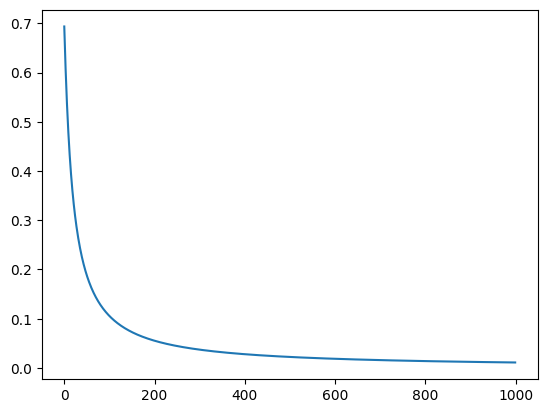

In [37]:
plt.plot(losses);

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [66]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [67]:
inputs=torch.from_numpy(inputs)
targets=torch.from_numpy(targets)
train_ds=TensorDataset(inputs, targets)
train_ds[:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[0.],
         [1.],
         [1.]]))

8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [68]:
batch_size=5
dl_set=DataLoader(train_ds, batch_size=batch_size, shuffle=True)
next(iter(dl_set))

[tensor([[ 73.,  67.,  43.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.],
         [ 69.,  96.,  70.],
         [ 87., 134.,  58.]]),
 tensor([[0.],
         [0.],
         [1.],
         [1.],
         [1.]])]

9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [106]:
class Logreg(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.linear1=torch.nn.Linear(3,3)
    self.act1=torch.nn.Sigmoid()
    self.linear2=torch.nn.Linear(3,1)

  def forward(self,x):
    x=self.linear1(x)
    x=self.act1(x)
    x=self.linear2(x)
    return x

In [107]:
model=Logreg()

10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [108]:
opt=torch.optim.SGD(model.parameters())
loss_fn=torch.nn.functional.binary_cross_entropy

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [109]:
# Модифікована функцію fit для відстеження втрат
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        # Ініціалізуємо акумулятор для втрат
        total_loss = 0

        for xb, yb in train_dl:
            # Генеруємо передбачення
            pred = model(xb)

            # Обчислюємо втрати
            loss = loss_fn(pred, yb)

            # Виконуємо градієнтний спуск
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Накопичуємо втрати
            total_loss += loss.item()

        # Обчислюємо середні втрати для епохи
        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        # Виводимо підсумок епохи
        if (epoch + 1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

In [110]:
fit_return_loss(1000, model, loss_fn, opt, dl_set)

Epoch [10/1000], Loss: 0.8942
Epoch [20/1000], Loss: 0.7985
Epoch [30/1000], Loss: 0.7487
Epoch [40/1000], Loss: 0.7192
Epoch [50/1000], Loss: 0.6979
Epoch [60/1000], Loss: 0.6832
Epoch [70/1000], Loss: 0.6718
Epoch [80/1000], Loss: 0.6625
Epoch [90/1000], Loss: 0.6541
Epoch [100/1000], Loss: 0.6475
Epoch [110/1000], Loss: 0.6411
Epoch [120/1000], Loss: 0.6351
Epoch [130/1000], Loss: 0.6304
Epoch [140/1000], Loss: 0.6238
Epoch [150/1000], Loss: 0.6192
Epoch [160/1000], Loss: 0.6142
Epoch [170/1000], Loss: 0.6097
Epoch [180/1000], Loss: 0.6050
Epoch [190/1000], Loss: 0.6007
Epoch [200/1000], Loss: 0.5966
Epoch [210/1000], Loss: 0.5925
Epoch [220/1000], Loss: 0.5893
Epoch [230/1000], Loss: 0.5846
Epoch [240/1000], Loss: 0.5822
Epoch [250/1000], Loss: 0.5788
Epoch [260/1000], Loss: 0.5738
Epoch [270/1000], Loss: 0.5713
Epoch [280/1000], Loss: 0.5673
Epoch [290/1000], Loss: 0.5639
Epoch [300/1000], Loss: 0.5621
Epoch [310/1000], Loss: 0.5575
Epoch [320/1000], Loss: 0.5554
Epoch [330/1000],

RuntimeError: all elements of input should be between 0 and 1